In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# Array creation and manipulation

By using miscellaneous constructors, indexing, slicing, and simple operations (+, −, *, :),
large arrays with various patterns can be created. Find a way to create these arrays.

- Create the following arrays:

  a) $$
\begin{pmatrix}
    1. & 1. & 1. & 1. \\
    1. & 1. & 1. & 1. \\
    1. & 1. & 1. & 2. \\
    1. & 6. & 1. & 1. \\
\end{pmatrix}
$$
  b)
$$
\begin{pmatrix}
    0 & 0 & 0 & 0 & 0 \\
    2 & 0 & 0 & 0 & 0 \\
    0 & 3 & 0 & 0 & 0 \\
    0 & 0 & 4 & 0 & 0 \\
    0 & 0 & 0 & 5 & 0 \\
    0 & 0 & 0 & 0 & 6 \\
\end{pmatrix}
$$

In [14]:
m = np.ones((4, 4))
m[3, 1] = 6
m[2, -1] = 2
m

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  2.],
       [ 1.,  6.,  1.,  1.]])

In [17]:
np.diag([2, 3, 4, 5, 6], k = -1)

array([[0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 6, 0]])

- Form this 2-D array (without explicitly typing it):
$$
\begin{pmatrix}
    1 & 6 & 11 \\
    2 & 7 & 12 \\
    3 & 8 & 13 \\
    4 & 9 & 14 \\
    5 & 10 & 15 \\
\end{pmatrix}
$$

In [22]:
np.arange(1, 16).reshape(5, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

- Generate a 10 × 3 array of random numbers ($\in [0, 1[$). ``Have a look at np.random.random`` for this. Then, for each row, pick
the number closest to 0.5. Use ``abs`` and ``argmin`` to find the column $j$ closest for
each row.



In [28]:
a = np.random.random((10, 3))
b = np.abs(m - 0.5)
b.argmin(axis=1)

# Matplotlib Exercises

- Plot a sine function from 0 to 6 using 50 points.
- Plot the line in red and with diamond shaped markers of size 5.
- Include a legend.

*Helpful functions*: ``plt.plot``, ``plt.legend``

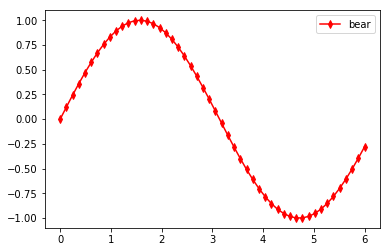

In [52]:
x = np.linspace(0, 6, 50)
y = np.sin(x)
plt.plot(x, y, color="red", marker = "d", markersize=5, label = "bear")
plt.legend()

Try to recreate the following plot:
<img src=fig/simple_plotting_2.png width=600> </img>
*Helpful functions:* ``plt.fill``, ``plt.fill_between``

In [168]:
t = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * t) * np.exp(-5 * t) 
y1 = np.sin(2 * np.pi * t) 
y2 = np.cos(2 * np.pi * t) 

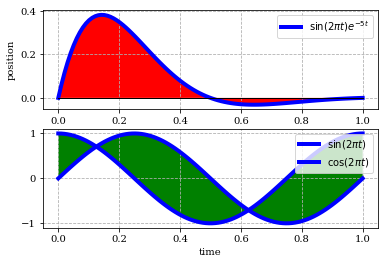

In [173]:
plt.subplot(2, 1, 1)
plt.plot(t, y, color = "blue", linewidth = 4, label = "$\sin(2 \pi t)e^{-5t}$")
plt.plot(t, np.zeros(len(y)), linewidth = 1, color = "black")
plt.fill(t, y, facecolor = "red", linewidth = 3)
plt.grid(linestyle = "--")
plt.ylabel("position") 
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, y1, color = "blue", linewidth = 4, label = "$\sin(2\pi t)$")
plt.plot(t, y2, color = "blue", linewidth = 4, label = "$\cos(2\pi t)$")
plt.fill_between(t, y1, y2, facecolor = "green")
plt.xlabel("time")
plt.legend(loc = "upper right")
plt.grid(linestyle = "--")

# Solving Systems of Linear Equations

You find three shopping bags with the following content:

* bag A: 10 kg apples, 5 kg pears, 1 kg oranges (cost: 35.35 units of money)
* bag B: 1 kg apples, 8 kg pears, 1 kg oranges (cost: 24.91)
* bag C: 9 kg apples, 3 kg pears, 5 kg oranges (cost: 40.38)

Determine the price of apples, oranges and pears:
1. Formulate a linear system of equations describing the shopping bags.
2. Use ``scipy.linalg.solve()`` (or ``numpy.linalg``) to solve the system of equations.
3. Verify the results by using ``np.dot()``.

In [41]:
A = [[10, 5, 1], [1, 8, 1], [9, 3, 5]]
y = [35.35, 24.91, 40.38]
x = np.linalg.solve(A, y)
np.dot(A, x)

array([ 35.35,  24.91,  40.38])

# Basic Statistics

1. Define a 1D Gaussian probability density function with $\mu = 10$ and $\sigma = 5$ using the formula
   $$\frac{1}{\sqrt{2\pi} \cdot \sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right)$$
2. Confirm that the integral of this function is approximately 1. To calculate the integral of $f$ from $a$ to $b$ use ``sp.integrate.quad(f, a, b)``. Note that $\infty$ is represented by ``np.inf``.
3. Instead of defining the distribution yourself, now use *only* ``scipy.stats.norm`` to:
   1. Draw 1000 samples (``sp.stats.norm.rvs``). Then plot a histogram using matplotlib.
   2. Recover the parameters $\mu$ and $\sigma$ of the gaussian
   from the random samples. Use ```scipy.stats.norm.fit```. (Note: we'll cover general curve fitting and some theory behind it in a later tutorial.)
3. Add both the estimated and the real Gaussian to the plot. If the histogram is not normalized correctly,
   normalize it so that it agrees with the lines (cf. the documentation of ``plt.hist``).
   4. Find the points that include 90% around the mean in the original distribution (``sp.stats.norm.interval``).
   Confirm that the total probability between these bounds is 90% using the comulative distribution function (``sp.stats.norm.cdf``).

In [ ]:
def f(x):
    return 1 / (np.sqrt(2 * np.pi) * 5) * np.exp(-(x - 10)**2 / 2 / 5**2 )

In [4]:
import scipy.integrate as integrate
integrate.quad(f, -np.inf, np.inf)

(1.0000000000000002, 7.63731474665117e-10)

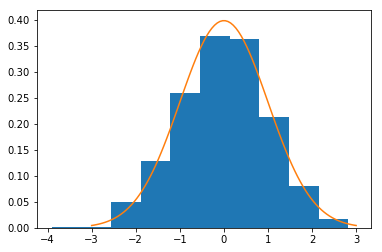

In [32]:
import scipy.stats as stats
x = stats.norm.rvs(size = 1000)
plt.hist(x, normed = True)
t = np.linspace(-3, 3, 100)
plt.plot(t, stats.norm.pdf(t))

In [19]:
stats.norm.fit(x)

(0.034006067539691341, 0.99071522071469997)

In [37]:
a, b = stats.norm.interval(0.9)
stats.norm.cdf(b) - stats.norm.cdf(a) 

0.90000000000000002

# Power spectral density

A continuous-time signal $x(t)$ can (under some assumptions) be decomposed into a superposition of various frequency components by means of the Fourier transform.
The power spectral density $S_{xx}(\omega)$ at frequency $\omega$ measures how much "power" the signal contains at frequency $\omega$, that is it measures the squared amplitude of  an oscillatory component. Precisely, $S_{xx}(\omega)$ is defined as

$$
S_{xx}(\omega) = \lim_{T\to\infty} \mathrm{E}\left[|\hat{x}_T(\omega)|^2\right]
$$
where $\hat{x}_T(\omega)$ denotes a "truncated" Fourier transform
$$
\hat{x}_T(\omega) = \frac{1}{\sqrt{T}}\int_0^T x(t)\,\mathrm{e}^{-i\omega t} dt
$$
and $\mathrm{E}$ denotes the expectation value over repeated realisations of the process generating the signal $x$.

One way to estimate the power spectral density is given by *Welch's method*, which is available in Python as ```scipy.signal.welch```.

Let's consider an artificial signal that is constructed by summing
different sine waves and try to reconstruct information about the underlying frequencies.

1. Construct a 20 seconds long signal sampled at 1kHz by adding 20 sine waves with a
   frequency randomly choosen from the interval [1Hz, 300Hz] (no phase shift is necessary).
   Add some gaussian noise to the signal.
2. Plot the signal in the interval t = 0, ..., 2s.
3. Use Welch's method to esimate the power spectral density for the signal.
4. Plot the estimated power spectral density. Also indicate in the plot the frequencies of the sine waves that the signal is composed of.

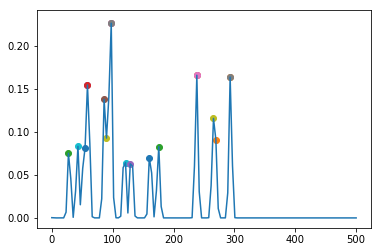

In [261]:
t = np.arange(0, 20, 1e-3)
x = np.random.randn(len(t))
x = np.zeros(len(t))
fx = []
for i in range(20):
    f = np.random.uniform(1, 300)
    fx.append(f)
    x += np.sin(2 * np.pi * f * t)
import scipy.signal as signal
fs, S = signal.welch(x, fs = 1000.0)
plt.plot(fs, S)
for f in fx:
    i = np.argmin(np.abs(fs - f))
    plt.scatter(fs[i], S[i])

# [Optional] Random Matrix

1. Create a random matrix, where the entries are randomly chosen from a standard
normal (Gaussian) distribution.
2. Plot the (complex!) eigenvalues of that matrix. I.e. plot the real and imaginary part of the eigenvalues on the $x$ and $y$ axes, respectively. Add labels to the axis and a
legend.
3. Add a title for your plot and make it red and increase the size.
4. Store your graph as an ``.pdf``. It should look something like this:
    <img src="fig/matrix1.png">

5. Define a function ``is_insde_circle`` that returns True if a point $(x, y)$ is contained in a circle of
radius $r$ around the origin. Make sure it works for array inputs.
6. Define a function to find the smallest circle containing all the eigenvalues of your
matrix.
7. [Optional] Plot the eigenvalues for a matrix of size N = 200, 500, 1000 together with the
smallest disc containing the eigenvalues. (*Hint:* ```plt.Circle```, ```ax.add_patch```, where ```ax``` is an AxesSubplot instance as returned, for example, by ```plt.add_subplot``` or ```plt.gca```)
    <img src="fig/matrix2.png">

In [230]:
def smallest_circle(A):
    eigs = np.linalg.eig(A)[0]
    return np.max(np.abs(eigs))

In [231]:
def is_inside_circle(x, y, r):
    return np.hypot(x, y) < r

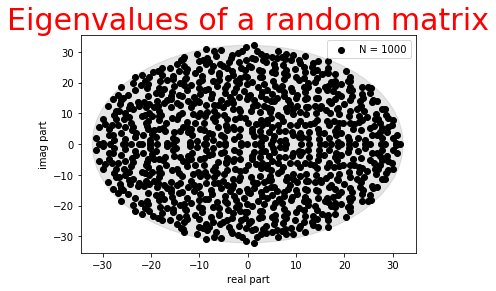

In [250]:
def eigenplot(N, color = "black"):
    A = np.random.randn(N, N)
    eigs = np.linalg.eig(A)[0]
    real, imag = np.real(eigs), np.imag(eigs)
    plt.scatter(real, imag, color = color, label = "N = %d" % N)
    ax = plt.gca()
    ax.add_patch(plt.Circle((0, 0), color = color, alpha = 0.1, radius = smallest_circle(A)))
    plt.legend()
    plt.xlabel("real part")
    plt.ylabel("imag part")

eigenplot(1000)
plt.title("Eigenvalues of a random matrix", color = "red", fontdict = {"fontsize": 30})
plt.savefig("eig.pdf")

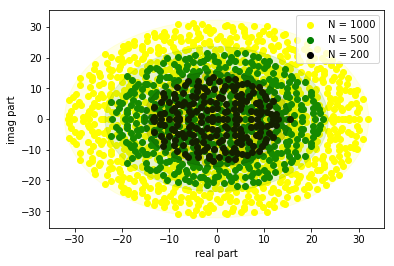

In [254]:
eigenplot(1000, color = "yellow")
eigenplot(500, color = "green")
eigenplot(200, color = "black")

# [Optional] ODE Integration

Consider the *Lotka-Volterra* equation of predator-prey interactions
$$
\frac{\text{d}N_1}{\text{d}t} = N_1 \cdot (\varepsilon_1 - \gamma_1 N_2), \\
\frac{\text{d}N_2}{\text{d}t} = -N_2 \cdot (\varepsilon_2 - \gamma_2 N_1)
$$
This is a system of ordinary differential equations, where $N_1(t)$ is the number of preys
and $N_2(t)$ the number of predators. $\varepsilon_1, \varepsilon_2, \gamma_1, \gamma_2$ are parameters representing the growth
and interaction between preys and predators.

  1. Find the fixed points of the system for the parameters $\varepsilon_1=1.0, \varepsilon_2=1.5, \gamma_1=0.1, \gamma_2=0.075$.
     * Fixed points are defined as those solutions of the system of equations where $\frac{\text{d}N_1}{\text{d}t}=0$ and $\frac{\text{d}N_2}{\text{d}t}=0$.
     * Define a function which takes as arguments an array of the current state [$N_1$,$N_2$], $t$, $\varepsilon_1$, $\gamma_1$, $\varepsilon_2$ and $\gamma_2$ and which returns the growth rates $\frac{\text{d}N_1}{\text{d}t}$ and $\frac{\text{d}N_2}{\text{d}t}$.
     * Use `scipy.optimize.fsolve` to find the fixed points (i.e. the solutions of $\frac{\text{d}N_1}{\text{d}t}=0$ and $\frac{\text{d}N_2}{\text{d}t}=0$) of the system.
  2. Solve the system of equations for the following initial conditions $N_1(0) = 10,\ N_2(0) = 5$.
     * Define a vector containing the time steps of the integration and one for the initial conditions.
     * Solve the system using `scipy.integrate.odeint()`
     * Lower the precision of the integrator until you see a difference in the solution. The integrator
       has multiple options for precision control (e.g. ``atol`` and ``rtol``).

In [122]:
def foo(N, t , e1 = 1.0, gamma1 = 0.1, e2 = 1.5, gamma2 = 0.075):
    N1, N2 = N
    dN1 = N1 * (e1 - gamma1 * N2)
    dN2 = -N2 * (e2 - gamma2 * N1)
    return dN1, dN2

In [125]:
import scipy.optimize as optimize
optimize.fsolve(foo, [0, 0], args = (0,))
optimize.fsolve(foo, [10, 10], args = (0,))

array([ 20.,  10.])

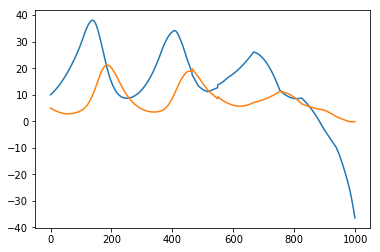

In [155]:
t = np.linspace(0, 20, 1000)
Nt = integrate.odeint(foo, [10, 5], t, rtol = 1)
plt.plot(Nt)